# GENERAL IMPORTS

External packages used throughout the notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from scipy.interpolate import make_interp_spline

# GENERAL CONFIGURATIONS

Some configurations that apply to the whole notebook

In [3]:
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

# IMPORTING AND FIRST LOOK AT THE DATA

In [4]:
# Reading CSV file into Pandas DataFrame
df = pd.read_csv(r"C:\analysis\FitnessAppData.csv")

In [5]:
df.head()

,Date,workoutId,exerciseId,singleSetId,exerciseName,reps,weight,fake_user_id
0,2021-02-09,UGEHJvFay3,58REE5sJU1,qDE4rWXIpq,Russian Twist,7,3.000000,fake_id_717
1,2021-01-22,7467FxsD4M,G1mxtZtEs5,7OYODpZQwA,Back Squat,5,61.235043,fake_id_722
2,2021-08-25,MSetDj1lHa,G1mxtZtEs5,u9a6P02hG1,Back Squat,6,83.914688,fake_id_734
3,2021-07-16,l9wk1qAux4,KVt5QRq9Hx,1Iv2QzHG4d,Side Laterals to Front Raise,7,4.535929,fake_id_698
4,2021-04-16,Uqh3hnRe2q,ACSgVaipTW,ixxHKFnYKG,Dumbbell Squeeze Press,12,6.803894,fake_id_708


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35583 entries, 0 to 35582
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          35583 non-null  object 
 1   workoutId     35583 non-null  object 
 2   exerciseId    35583 non-null  object 
 3   singleSetId   35583 non-null  object 
 4   exerciseName  35583 non-null  object 
 5   reps          35583 non-null  int64  
 6   weight        35583 non-null  float64
 7   fake_user_id  35583 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.2+ MB


In [7]:
df.describe()

,reps,weight
count,35583.000000,35583.000000
mean,12.260152,17.345797
std,16.123749,21.828936
min,0.000000,0.000000
25%,8.000000,0.000000
50%,10.000000,9.071858
75%,13.000000,24.947610
max,250.000000,181.437164


In [8]:
df["singleSetId"].nunique()

35583

In [9]:
df["exerciseId"].nunique()

103

In [10]:
df["exerciseName"].nunique()

103

In [11]:
print(f"Duplicate rows: {len(df[df.duplicated()])}")

Duplicate rows: 0


<b>Section conclusions</b>
- Total of 35583 rows and 7 features
- No Null values
- No duplicated rows
- One workout includes different exercises, and different sets of one exercise happen in a workout

# EXPLORATORY DATA ANALYSIS PT.1 (Exercises, weight and reps)

<b> Visualizing features' distributions </b>

Text(0.5, 1.0, 'Reps and weight boxplot')

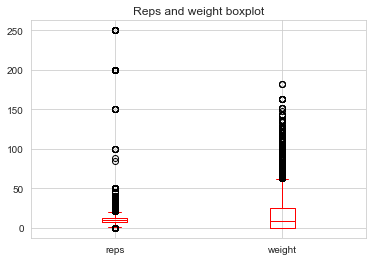

In [15]:
df.boxplot(color="red")
plt.title("Reps and weight boxplot")

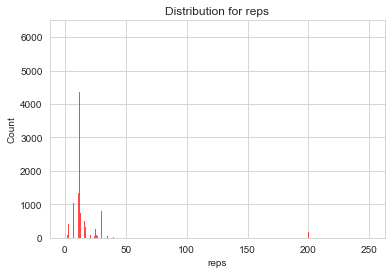

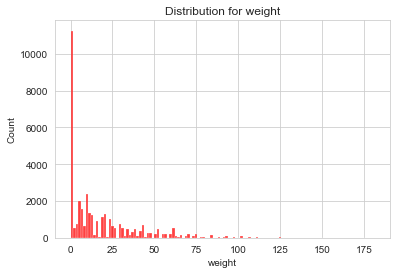

In [13]:
# Checking our features' distribution
for c in df.columns[5:7]:
    plt.figure()
    plt.title(f"Distribution for {c}")
    sns.histplot(df[c],color="red")

Looking at the distribution without any type of slicing does not make a lot of sense, different types of exercises introduce a lot of variability to the data. It is important to explore the different exercises.

Number of different exercises: 103


<AxesSubplot:>

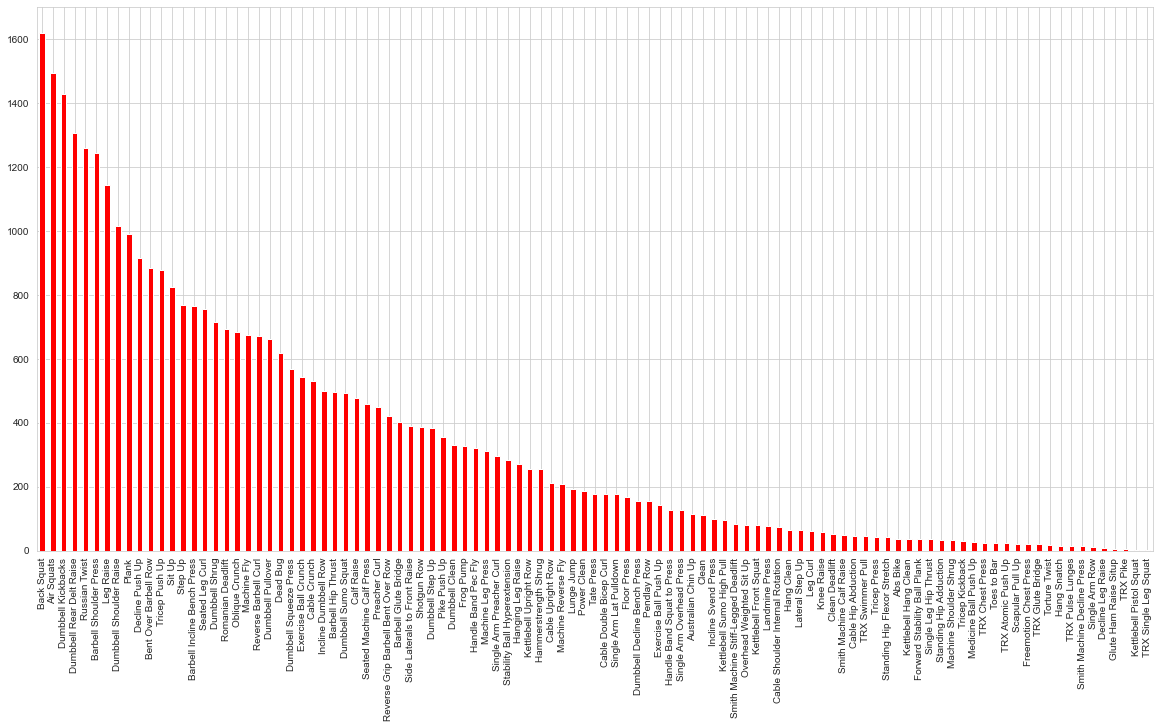

In [16]:
# Counting amount of exercises in the dataset
print(f"Number of different exercises: {df['exerciseName'].nunique()}")
value_counts_series = df["exerciseName"].value_counts().sort_values(ascending=False)
value_counts_series.plot(kind='bar', figsize=(20,10), color="red")

There are a lot of exercises, some are more popular than others.

Visualizing reps and weight distribution in the 10 MOST POPULAR exercises

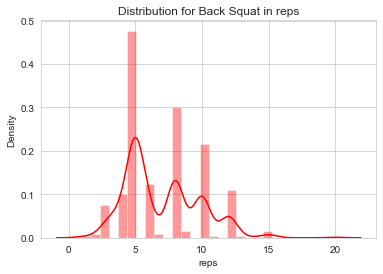

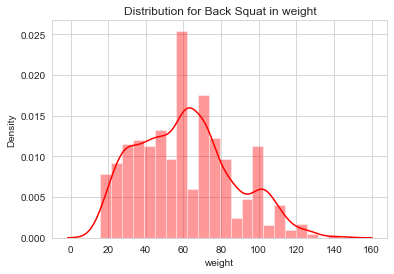

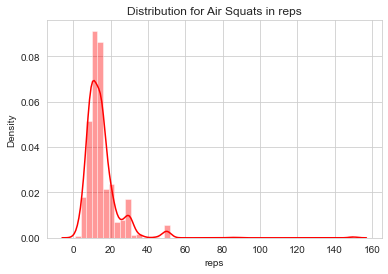

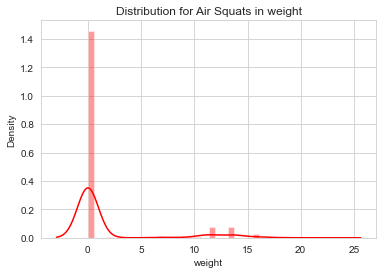

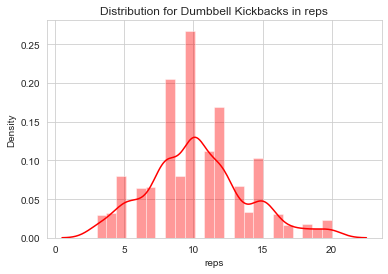

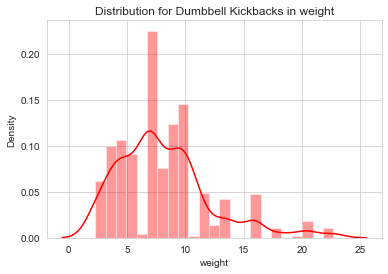

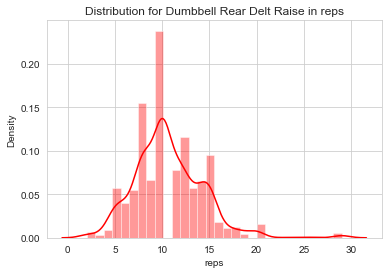

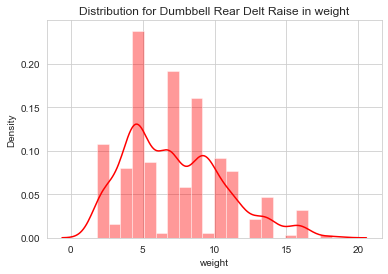

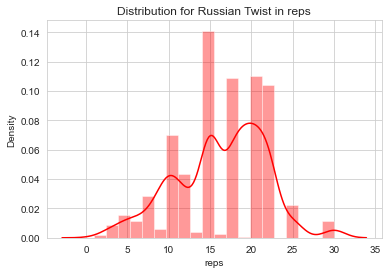

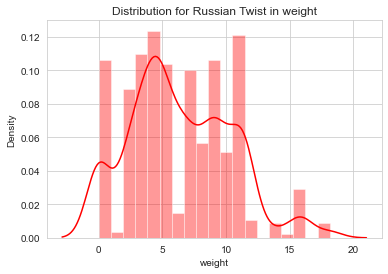

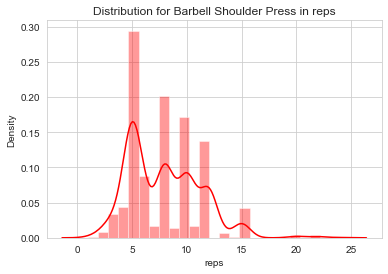

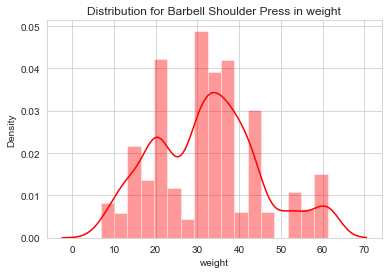

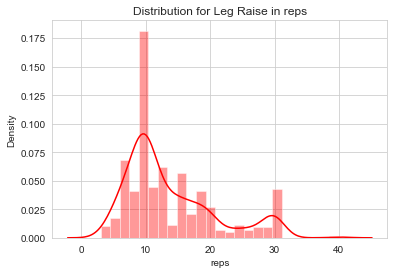

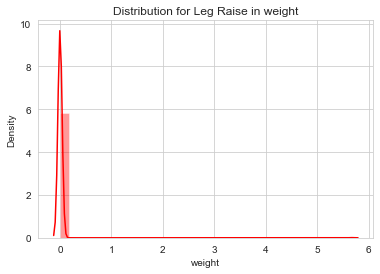

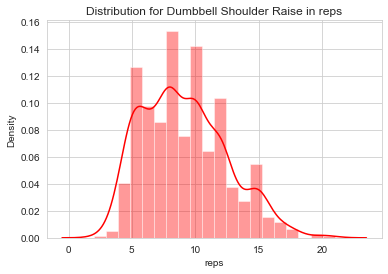

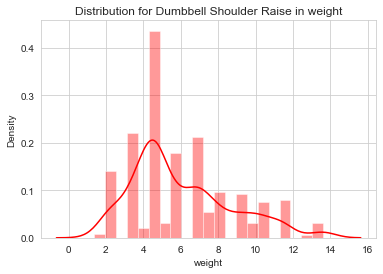

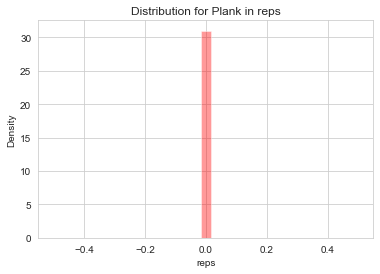

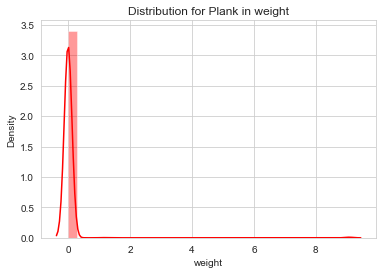

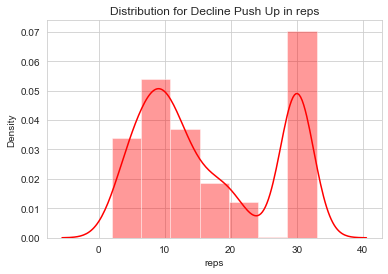

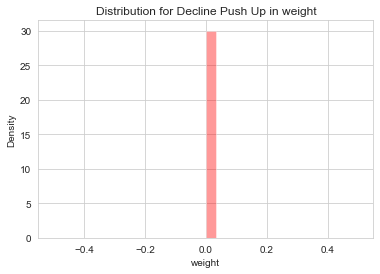

In [17]:
# 10 exercises that appear the most in the DF
top10exercies = value_counts_series.index.values[:10]
for exercise in top10exercies:
    for c in df.columns[5:7]:
        plt.figure()
        plt.title(f"Distribution for {exercise} in {c}")
        sns.distplot(df.loc[df["exerciseName"]==exercise, c], color="red")

In [50]:
exercise_reps_group = df.groupby("exerciseName")["reps"].mean()
print(f"Exercise with max rep average: {exercise_reps_group.idxmax()}, {max(exercise_reps_group)}")

exercise_weight_group = df.groupby("exerciseName")["weight"].mean()
print(f"Exercise with max weight average: {exercise_weight_group.idxmax()}, {max(exercise_weight_group)}")

Exercise with max rep average: Exercise Ball Crunch, 88.51381215469613
Exercise with max weight average: Machine Leg Press, 68.54318658090743


<b> Section Conclusions </b>
- Distributions look closer to follow a normal distribution when separating between exercises
- People like even numbers for picking reps and weight
- There are exercises that don't involve reps (Plank)
- There are exercises that rarely or never involve weight (Air Squats, Push Up)
- Numbers look pretty normal and is what you could see in the gym
- The exercise with a maximum reps average is Exercise Ball Crunch: 88.51381215469613
- The exercise with a maximum weight average is: Machine Leg Press: 68.54318658090743

<b> Visualizing correlation between reps and weight </b>

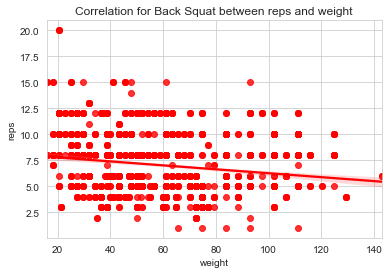

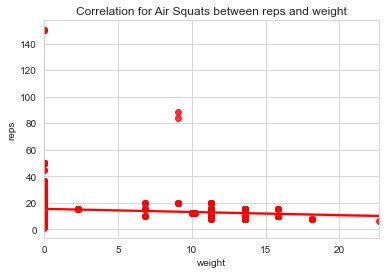

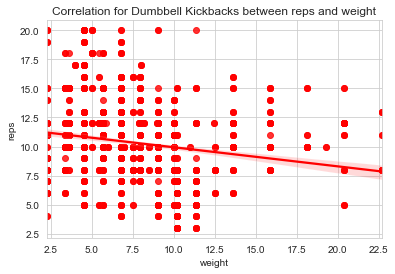

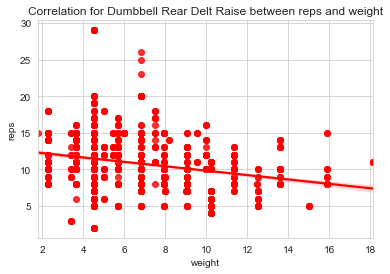

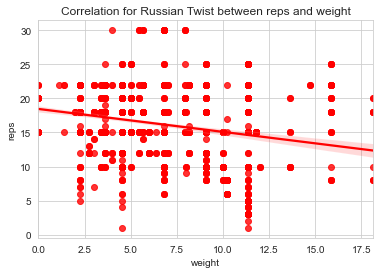

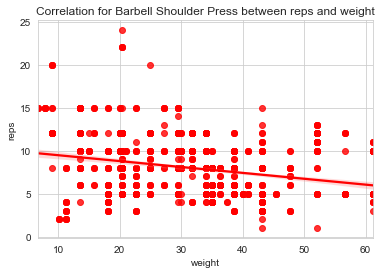

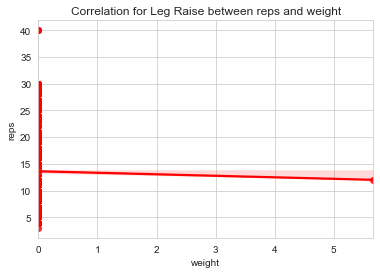

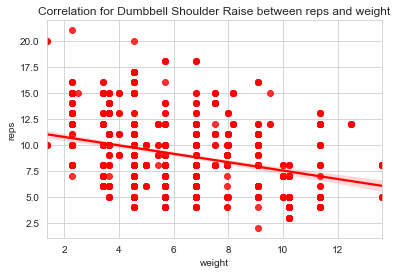

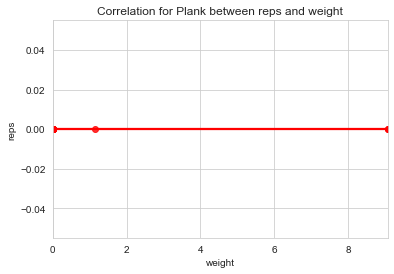

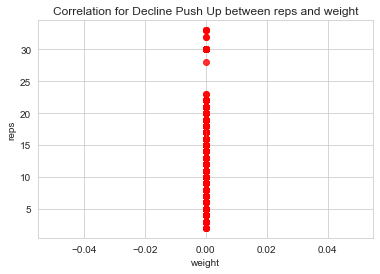

<Figure size 432x288 with 0 Axes>

In [18]:
# Correlation between reps and weight for top 5 exercises
for exercise in top10exercies:
    plt.title(f"Correlation for {exercise} between reps and weight")
    sns.regplot(df.loc[df["exerciseName"]==exercise, "weight"],
                df.loc[df["exerciseName"]==exercise, "reps"],
                color="red")
    plt.figure()

<b> Section Conclusions </b>
- The two features tend to be negatively correlated, which translates as the more weight the less reps, which makes sense.

<b> Visualizing average reps and weight for the top 10 exercises (most appearances in the dataset) </b>

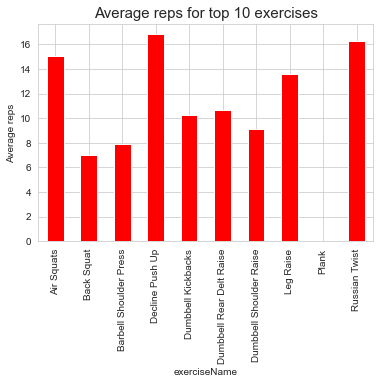

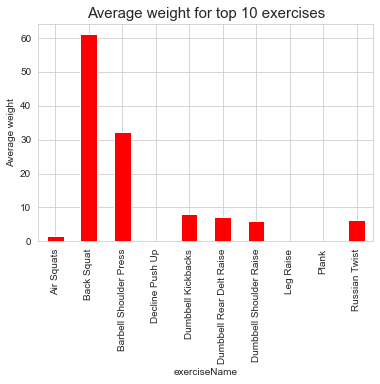

In [19]:
exercise_reps_group = df.loc[df["exerciseName"].isin(top10exercies)].groupby("exerciseName")["reps"].mean()
exercise_reps_group.plot(kind="bar", color="red")
plt.title("Average reps for top 10 exercises", fontsize=15)
plt.ylabel("Average reps")
plt.show()

exercise_weight_group = df.loc[df["exerciseName"].isin(top10exercies)].groupby("exerciseName")["weight"].mean()
exercise_weight_group.plot(kind="bar", color="red")
plt.title("Average weight for top 10 exercises", fontsize=15)
plt.ylabel("Average weight")
plt.show()

<b> Section Conclusions </b>
- As expected, weight averages vary depending on the different muscle groups (f. ex. It is easier to lift weight using your back than using your deltoid)

<b> Extracting some insights from exercises-weight-reps </b>

In [20]:
exercise_reps_group = df.groupby("exerciseName")["reps"].mean()
print(f"Exercise with max rep average: {exercise_reps_group.idxmax()}, {max(exercise_reps_group)}")

exercise_weight_group = df.groupby("exerciseName")["weight"].mean()
print(f"Exercise with max weight average: {exercise_weight_group.idxmax()}, {max(exercise_weight_group)}")

Exercise with max rep average: Exercise Ball Crunch, 88.51381215469613
Exercise with max weight average: Machine Leg Press, 68.54318658090743


# EXPLORATORY DATA ANALYSIS PT.2 (Users)

<b> Visualizing users and app/fitness regularity </b>

There is data from: 78 users
There is 5524 unique workouts


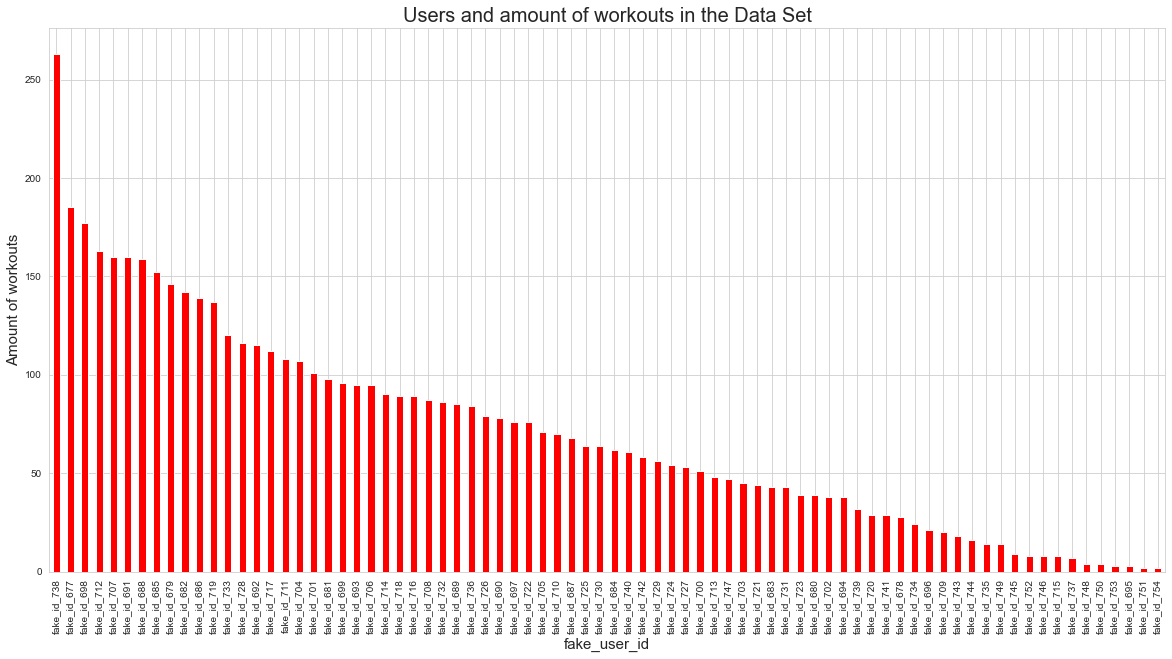

In [20]:
# Counting appearances of each user in dataset
print(f"There is data from: {df['fake_user_id'].nunique()} users")
print(f"There is {df['workoutId'].nunique()} unique workouts")

# To obtain the amount of workouts per user we need to perform a double group-by
user_n_workouts = df.groupby(["fake_user_id","workoutId"])["reps"].count().groupby("fake_user_id").count().sort_values(ascending=False)
user_n_exercises = df.groupby("fake_user_id")["reps"].count()

# Plot users and amount of workouts
user_n_workouts.plot(kind='bar', figsize=(20,10), color="red")
plt.title("Users and amount of workouts in the Data Set", fontsize=20)
plt.xlabel("fake_user_id", fontsize=15)
plt.ylabel("Amount of workouts", fontsize=15)
plt.show()

<b> Visualizing relationship between amount of exercises and workouts </b>

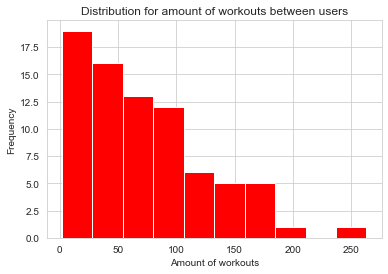

In [21]:
user_n_workouts.plot(kind='hist', color="red")
plt.xlabel("Amount of workouts")
plt.title("Distribution for amount of workouts between users")
plt.show()

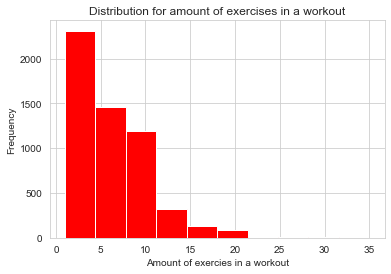

Users do an average of 6.44 exercices in a workout


In [22]:
workout_exercise_count = df.groupby("workoutId")["exerciseId"].count().sort_values(ascending=False)
workout_exercise_count.plot(kind='hist', color="red")
plt.xlabel("Amount of exercies in a workout")
plt.title("Distribution for amount of exercises in a workout")
plt.show()

print(f"Users do an average of {round(workout_exercise_count.mean(), 2)} exercices in a workout")

In [40]:
sets_exercise_count = df.groupby(["workoutId","exerciseId"])["singleSetId"].count()
print(f"Users do an average of {round(sets_exercise_count.mean(), 2)} sets for an exercise")

Users do an average of 3.51 sets for an exercise


In [24]:
# Adding 2 columns to the original dataset with n_workouts and n_exercises for each users
df["n_workouts"] = [user_n_workouts[i] for i in df["fake_user_id"]]
df["n_exercises"] = [user_n_exercises[i] for i in df["fake_user_id"]]

# Adding 1 column for the average amount of exercises that each user does in a workout
avg_exercises_in_a_workout = [k/i for i, k in zip(df["n_workouts"], df["n_exercises"])]
df["avg_exercises_in_a_workout"] = avg_exercises_in_a_workout

<b> Studying the relationships between users and other features </b>

In [25]:
# Creating a new DataFrame where each row is a user to zoom in their behavior
# Grouping by user and averaging different features in order to do so
user_weight_avg = df.groupby("fake_user_id")["weight"].mean()
user_rep_avg = df.groupby("fake_user_id")["reps"].mean()
ex_per_workout = df.groupby("fake_user_id")["avg_exercises_in_a_workout"].mean()
user_n_workouts = df.groupby("fake_user_id")["n_workouts"].mean()
user_n_exercies = df.groupby("fake_user_id")["n_exercises"].mean()
df_users = pd.DataFrame({ 
                          "n_workouts":list(user_n_workouts),
                          "n_exercises":list(user_n_exercises),
                          "avg_weight":list(user_weight_avg),
                          "avg_rep":list(user_rep_avg),
                          "avg_exercises_in_a_workout":list(ex_per_workout)})

# This is how it looks like
df_users.head()

,n_workouts,n_exercises,avg_weight,avg_rep,avg_exercises_in_a_workout
0,185,1051,1.358405,13.052331,5.681081
1,28,200,12.394426,9.260000,7.142857
2,146,1016,18.476098,8.987205,6.958904
3,39,200,1.797362,9.970000,5.128205
4,98,1016,17.472256,8.954724,10.367347


<AxesSubplot:>

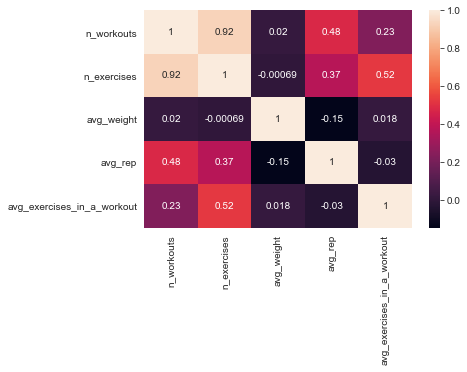

In [26]:
# Exploring the correlations between features in this new DataFrame by plotting a heat map/ Correlation matrix
# That measures Pearson correlation
sns.heatmap(df_users.corr(), annot=True)

<b> Looking closer at certain features correlation </b>

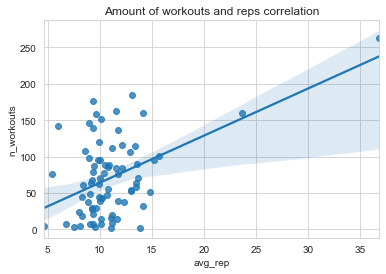

In [27]:
sns.regplot(df_users["avg_rep"], df_users['n_workouts'])
plt.title("Amount of workouts and reps correlation")
plt.show()

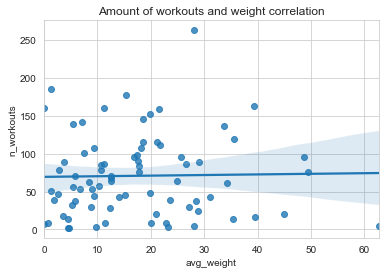

In [46]:
sns.regplot(df_users["avg_weight"], df_users['n_workouts'])
plt.title("Amount of workouts and weight correlation")
plt.show()

<b> Separating between active and no-active users and looking at which exercises they do </b>

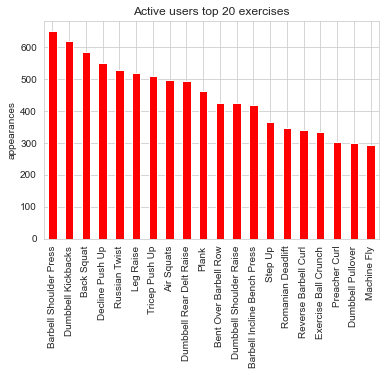

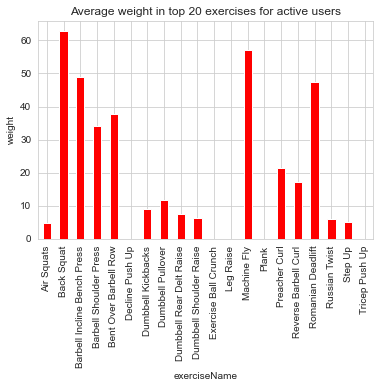

In [28]:
# Separating users between those above the average of amount of workouts and those below
df_above_average = df.loc[df["n_workouts"]>112]

value_counts_series = df_above_average["exerciseName"].value_counts().sort_values(ascending=False)[:20]
value_counts_series.plot(kind='bar',color="red")
plt.title("Active users top 20 exercises")
plt.ylabel("appearances")
plt.show()

top_20_exercies_active = list(value_counts_series.index)
exercise_weight_group = df_above_average.loc[df_above_average["exerciseName"].isin(top_20_exercies_active)].groupby("exerciseName")["weight"].mean()

exercise_weight_group.plot(kind="bar",color="red")
plt.title("Average weight in top 20 exercises for active users")
plt.ylabel("weight")
plt.show()

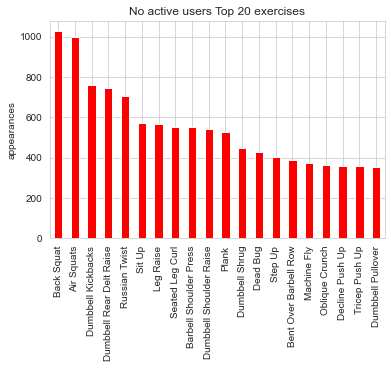

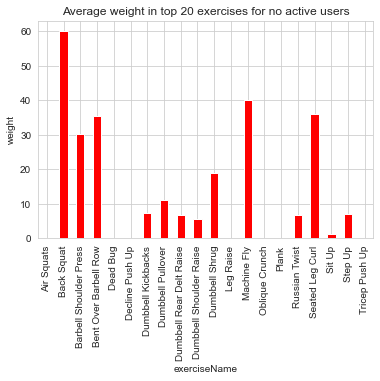

In [30]:
df_below_average = df.loc[df["n_workouts"]<112]
value_counts_series = df_below_average["exerciseName"].value_counts().sort_values(ascending=False)[:20]
value_counts_series.plot(kind='bar', color="red")
plt.title("No active users Top 20 exercises")
plt.ylabel("appearances")
plt.show()

top_20_exercies_noactive = list(value_counts_series.index)
exercise_weight_group = df_below_average.loc[df_below_average["exerciseName"].isin(top_20_exercies_noactive)].groupby("exerciseName")["weight"].mean()

exercise_weight_group.plot(kind="bar", color="red")
plt.title("Average weight in top 20 exercises for no active users")
plt.ylabel("weight")
plt.show()

<b> Section Conclusions </b>
- We have data from 78 users
- There is a lot of variablity within the users activity (Amount of workouts) some use the app/ workout a lot, others barely show up in the DataFrame
- Users do an average of 6.44 exercices in a workout
- Users do an average of 3.51 sets for an exercise
- The more active is a user the more reps they do
- User activity is not correlated to the weight
- Distribution for amount of workouts follow an exponantial distribution (In general users in this dataset use the app quite often)
- We can see again how reps and weight are negatively correlated
- It is weird that users with more workouts (active users) do not lift more weight
- Active users who workout more prefer to do reasonable weight, more reps and more exercises vs users who workout less that prefer to lift as much weight as possible
- Active and no-active users do different exercises

# EXPLORATORY DATA ANALYSIS PT.3 (Time)

In [35]:
# Converting Date column from string to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Number of days in the dataset
print(f"Number of days elapsed: {df['Date'].max() - df['Date'].min()}")

Number of days elapsed: 320 days 00:00:00


<b> Looking at the app usage over time and over the week</b>

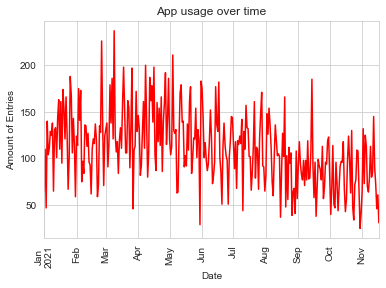

In [38]:
df.groupby("Date")["Date"].count().plot(color="red")
plt.title("App usage over time")
plt.ylabel("Amount of Entries")
plt.xticks(rotation=90)
plt.show()

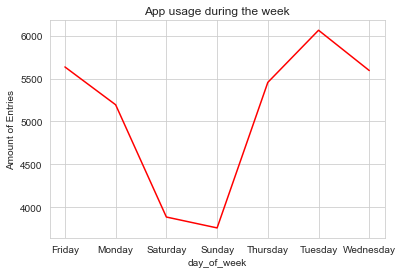

In [36]:
# Creating a new feature day_of_the week in the DataFram
df['day_of_week'] = df['Date'].dt.day_name()
df.groupby("day_of_week")["day_of_week"].count().sort_index().plot(color="red")
plt.title("App usage during the week")
plt.ylabel("Amount of Entries")
plt.show()

<b> Section Conclusions </b>
- People tend to go to the gym during weekdays
- There's a clear seasonality factor in the app usage, people go more frequently to the gym as the year begins and decrease their activity as the summer starts

<b> Time-series analysis: Looking at users evolution during time in terms of weight </b>

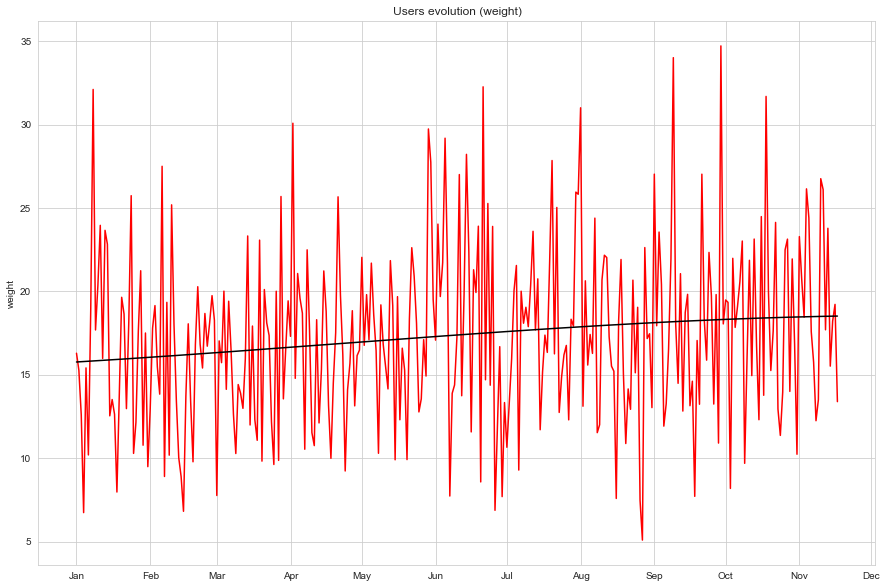

In [40]:
from scipy.interpolate import splrep, splev
# Making ticks be a month
import matplotlib.dates as mdates

# Groupping by the Date, averaging and selecting the weight column
date_weight_group = df.groupby("Date")["weight"].mean()

# Plotting the evolution, since data is noisy we need to use interpolation (orange line) to be able to extract an insight
fig, ax = plt.subplots(figsize=(15,10))
range_indices = [i for i in range(len(date_weight_group.index))]
bspl = splrep(range_indices, date_weight_group.values,s=10000000)
bspl_y = splev(range_indices, bspl)
plt.plot(list(date_weight_group.index),date_weight_group.values, color="red")
plt.plot(list(date_weight_group.index),bspl_y, color="black")
plt.ylabel("weight")
plt.title("Users evolution (weight)")

# Ticks formatting
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()


<b> Time-series analysis: Looking at users evolution during time in terms of reps </b>

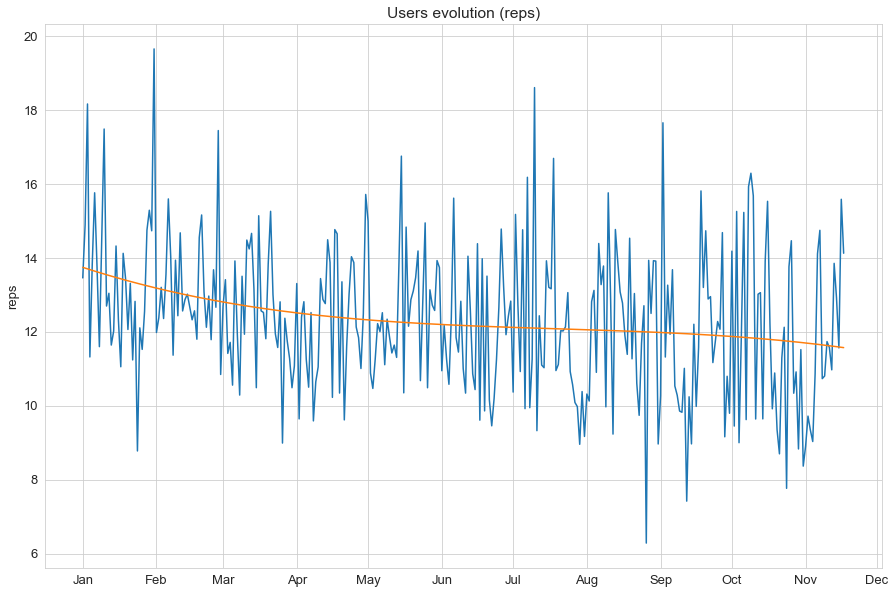

In [162]:
# Groupping by the Date, averaging and selecting the reps column
date_weight_group = df.groupby("Date")["reps"].mean()

fig, ax = plt.subplots(figsize=(15,10))
bspl = splrep([i for i in range(len(date_weight_group.index))],date_weight_group.values,s=10000000)
bspl_y = splev([i for i in range(len(date_weight_group.index))],bspl)
plt.plot(list(date_weight_group.index),date_weight_group.values)
plt.plot(list(date_weight_group.index),bspl_y)
plt.ylabel("reps")
plt.title("Users evolution (reps)")

# Ticks formatting
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()


<b> Section Conlusions </b>
- Two clear tendencies: Users lift more weight over time and do less reps
- It is unclear to tell if there is an improvement

<b> Time-series analysis: Looking at users evolution during time in terms of reps. This time separating between active and no-active users </b>

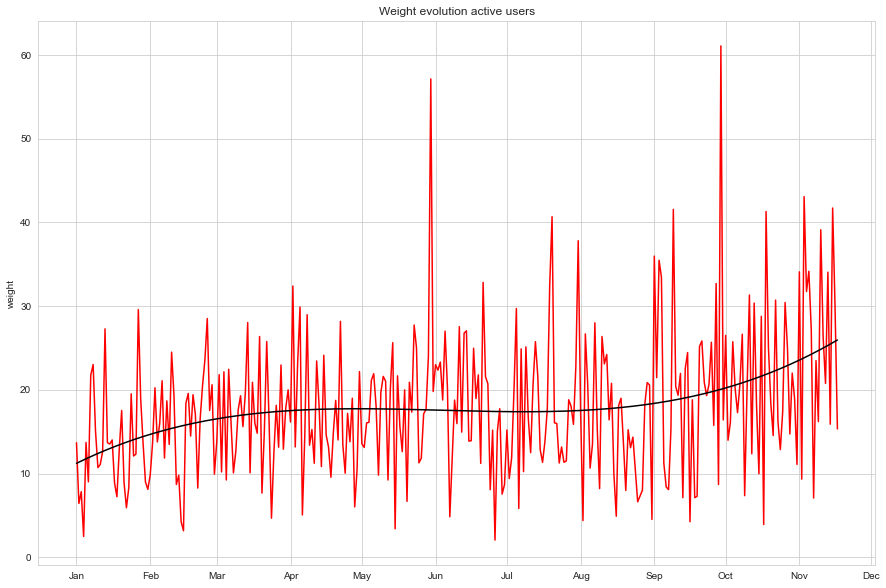

In [41]:
# Groupping by Date again, but using the df we created before for active users
date_weight_group_active = df_above_average.groupby("Date")["weight"].mean()

fig, ax = plt.subplots(figsize=(15,10))
plt.title("Weight evolution active users")
plt.ylabel("weight")
range_indices = [i for i in range(len(date_weight_group_active.index))]
bspl = splrep(range_indices, date_weight_group_active.values,s=10000000)
bspl_y = splev(range_indices, bspl)
plt.plot(list(date_weight_group_active.index),date_weight_group_active.values, color="red")
plt.plot(list(date_weight_group_active.index),bspl_y, color="black")

# Ticks formatting
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()

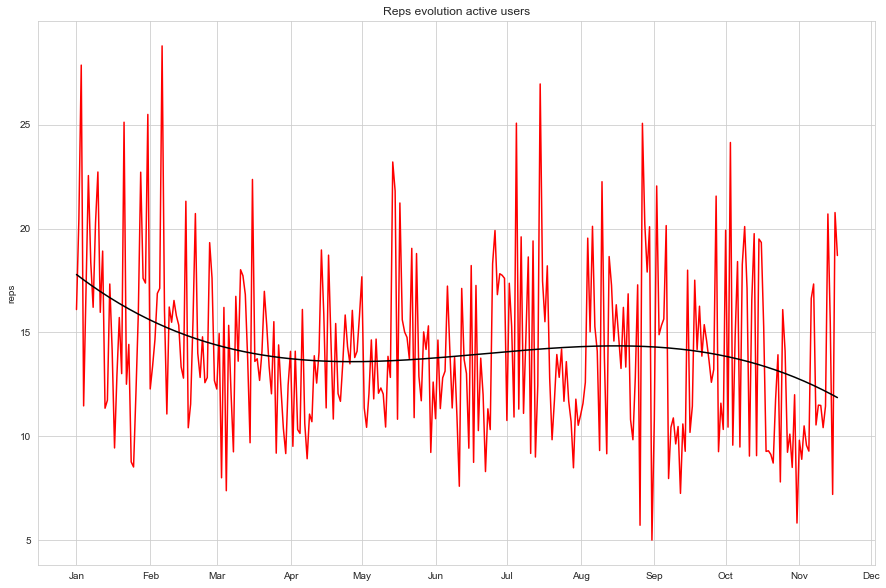

In [42]:
date_reps_group_active = df_above_average.groupby("Date")["reps"].mean()

fig, ax = plt.subplots(figsize=(15,10))
plt.title("Reps evolution active users")
plt.ylabel("reps")
range_indices = [i for i in range(len(date_reps_group_active.index))]
bspl = splrep(range_indices, date_reps_group_active.values,s=10000000)
bspl_y = splev(range_indices, bspl)
plt.plot(list(date_reps_group_active.index),date_reps_group_active.values, color="red")
plt.plot(list(date_reps_group_active.index),bspl_y, color="black")

# Ticks formatting
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()


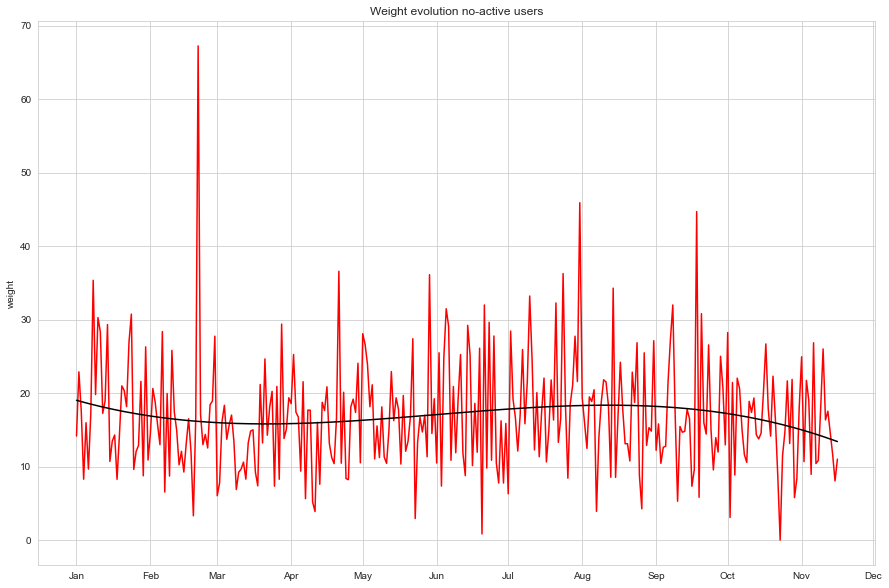

In [44]:
date_weight_group_noactive = df_below_average.groupby("Date")["weight"].mean()

fig, ax = plt.subplots(figsize=(15,10))
plt.title("Weight evolution no-active users")
plt.ylabel("weight")
range_indices = [i for i in range(len(date_weight_group_noactive.index))]
bspl = splrep(range_indices, date_weight_group_noactive.values,s=10000000)
bspl_y = splev(range_indices, bspl)
plt.plot(list(date_weight_group_noactive.index),date_weight_group_noactive.values, color="red")
plt.plot(list(date_weight_group_noactive.index),bspl_y, color="black")

# Ticks formatting
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()

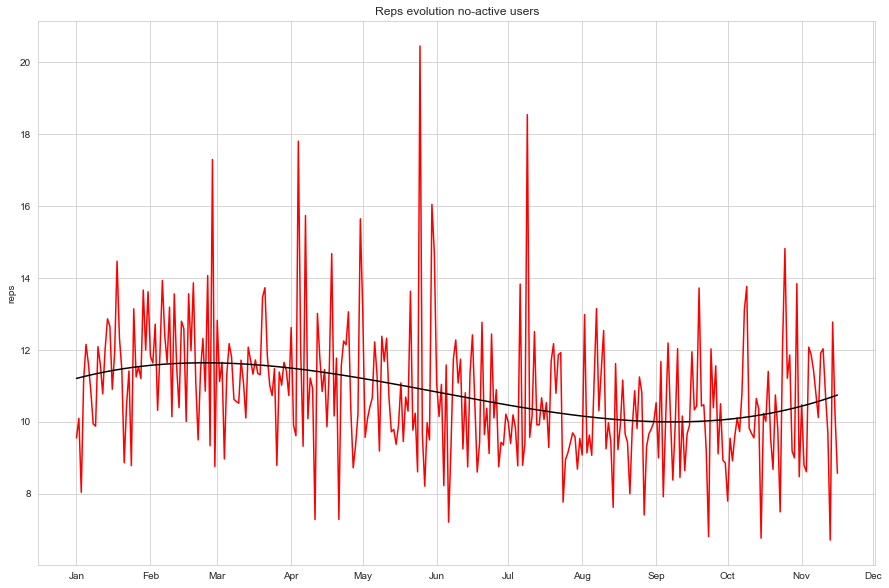

In [45]:
date_reps_group_noactive = df_below_average.groupby("Date")["reps"].mean()

fig, ax = plt.subplots(figsize=(15,10))
plt.title("Reps evolution no-active users")
plt.ylabel("reps")
range_indices = [i for i in range(len(date_reps_group_noactive.index))]
bspl = splrep(range_indices, date_reps_group_noactive.values,s=10000000)
bspl_y = splev(range_indices, bspl)
plt.plot(list(date_reps_group_noactive.index),date_reps_group_noactive.values, color="red")
plt.plot(list(date_reps_group_noactive.index),bspl_y, color="black")

# Ticks formatting
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()

<b> Section Conlusions </b>
- When splitting between active and no-active users, we can observe how active users have a clear increase in weight and a clear decrease in reps over time
- No-active users show decrease in both features
- No-active users do not really show any evolution and the trend seems to be more linked to seasonality
- It is not clear if users evolution can be marked as "good", we need to come up with something smarter than weights/reps

<b> Time Series Analysis: New feature one-rp </b>

Since we are observing an increasing on weight and a decresing on reps over time, we cannot be sure if the users are actually gaining strength/being more fit over time, we need a feature that combines both.
It is common in the fitness world to use something called one-repetition maximum that is the maximum amount of weight that a person can possibly lift for one repetition (Wikipedia).

We are using the Brzycki formula to calculate this value, since it seems to be the most common (Wikipedia).

In [48]:
def brzycki(reps, weight):
    """
    This function receives reps and weights and outputs 1RM which is is 
    the maximum amount of weight that a person can possibly lift for one repetition
    
    Args:
        reps: Reps performed in an exercise
        weight: Weight lifted in an exercise
    
    Returns:
        onerp: brzycki one-repetition maximum value
    
    """
    
    
    onerp = weight / (1.0278 - 0.0278 * reps)
    if onerp < 0:
        onerp = 0
    return onerp
    

In [49]:
# Creating the new onerp feature
df["onerp"] = [brzycki(r,w) for r, w in zip(df["reps"].values, df["weight"].values)]

# Reloading df's below and above average
df_above_average = df.loc[df["n_workouts"]>112]
df_below_average = df.loc[df["n_workouts"]<112]

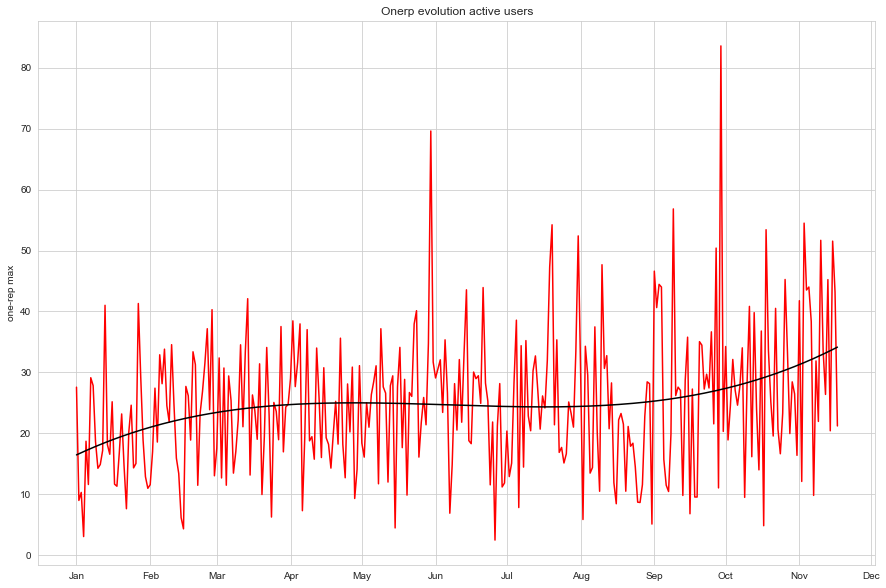

In [50]:
date_onerp_group_active = df_above_average.groupby("Date")["onerp"].mean()

fig, ax = plt.subplots(figsize=(15,10))
plt.title("Onerp evolution active users")
plt.ylabel("one-rep max")
range_indices = [i for i in range(len(date_onerp_group_active.index))]
bspl = splrep(range_indices, date_onerp_group_active.values,s=10000000)
bspl_y = splev(range_indices, bspl)
plt.plot(list(date_onerp_group_active.index),date_onerp_group_active.values,color="red")
plt.plot(list(date_onerp_group_active.index),bspl_y,color="black")

# Ticks formatting
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()


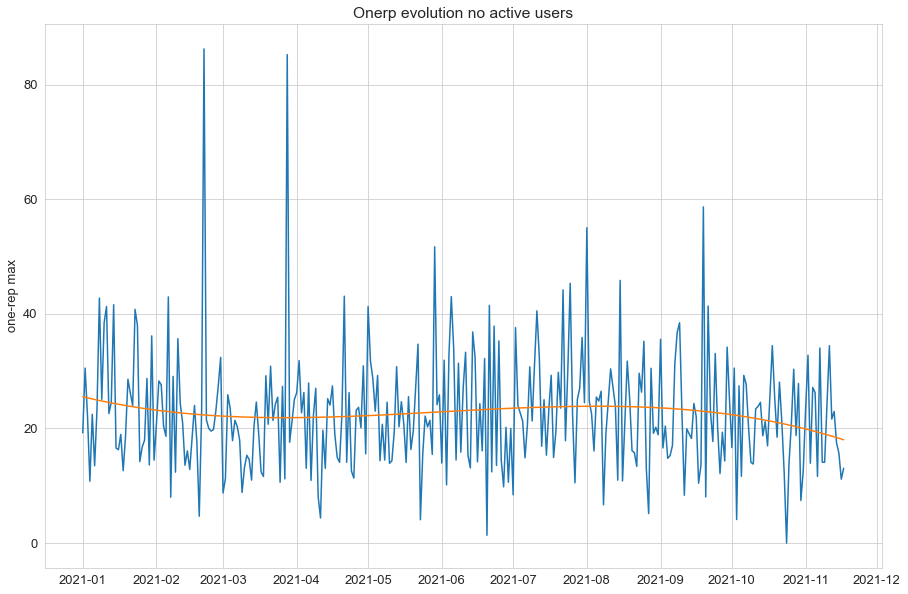

In [170]:
date_onerp_group_noactive = df_below_average.groupby("Date")["onerp"].mean()

plt.figure(figsize=(15,10))
plt.title("Onerp evolution no active users")
plt.ylabel("one-rep max")
range_indices = [i for i in range(len(date_onerp_group_noactive.index))]
bspl = splrep(range_indices, date_onerp_group_noactive.values,s=10000000)
bspl_y = splev(range_indices, bspl)
plt.plot(list(date_onerp_group_noactive.index),date_onerp_group_noactive.values)
plt.plot(list(date_onerp_group_noactive.index),bspl_y)

# Ticks formatting
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()


<b> Section Conclusions </b>
- Now, since we are using the new feature one-rep we can say if there is an evolution or not
- Active users show a clear improvement
- No-active users' evolution look very steady, and if something it decreases a little

# MODELING PT.1 (Regression Model)

<b> In this section we'll try predict the weight feature across the dataset </b>

# Pre-processing stage

<b> Data Cleaning </b>

We create a new DataFrame df_processed which will be used for modeling

In [64]:
# Removing about 3000 entries, we'll only work with the top 50 exercises
value_counts_exercises = df["exerciseName"].value_counts().sort_values(ascending=False)
notused_exercies = value_counts_exercises.index[:50]
df_processed = df[df["exerciseName"].isin(notused_exercies)]

In [65]:
# Removing users with less than 50 workouts
active_users = user_n_workouts[user_n_workouts > 50].index
df_processed = df[df["fake_user_id"].isin(active_users)]

In [66]:
# Dropping columns with weight 0
df_processed = df_processed.loc[df_processed["weight"]!=0]

<b> Section Summary </b>
- We took care of outliers in this section
- We only kept rows with exercises from the top 50 most used exercises list
- Removed users with less than 50 workouts
- Removed columns with weight 0, since it does not make sense to predict something we know that likely is going to be 0

<b> Feature Engineering </b>

In [67]:
# Adding two columns for avg_weight per user and avg_reps
df_processed["avg_weight_user"] = df_processed.groupby("fake_user_id")["weight"].transform("mean")
df_processed["avg_rep_user"] = df_processed.groupby("fake_user_id")["reps"].transform("mean")

In [68]:
# We need to encode categorical variables. One-hot-encoding would increase the dimensionality a lot, we'll use target encoding
# So, exerciseName will contain the average weight for that exercise and fake_user_id the average weight for that user
import category_encoders as ce

te=ce.TargetEncoder() 
df_processed["exerciseName"]=te.fit_transform(df_processed['exerciseName'],df_processed['weight'])
df_processed.rename(columns={'exerciseName':'weight_mean_exercise'}, inplace=True)

te=ce.TargetEncoder() 
df_processed["fake_user_id"]=te.fit_transform(df_processed['fake_user_id'],df_processed['weight'])
df_processed.rename(columns={'fake_user_id':'weight_mean_user'}, inplace=True)

In [69]:
# To encode days of the week we are going to convert days of the week into a binary feature, is weekend or not
df_processed["day_of_week"] = [0 if day =="Saturday" or day=="Sunday" else 1 for day in df_processed["day_of_week"]]
df_processed.rename(columns={'day_of_week':'is_weekend'}, inplace=True)

In [70]:
# Dropping columns that are not going to be helpful to the model
df_processed = df_processed.drop(['workoutId', 'exerciseId', 
                'singleSetId', 'Date', "onerp"], axis=1)

In [71]:
# Looking at the weight maximum in different exercises looks like there's no mixed unities (lb/kg), and that the weights were
# transformed into a kg, it makes sense to transform them back to lb and getting rid of the decimals (weights in gym do not have
# decimals oftenly), this will help the model perform better too.

pound_conversion = 2.20462

df_processed["weight"] = [round(weight * pound_conversion) for weight in df_processed["weight"]]

In [94]:
# This is how our new dataset looks like
df_processed.head()

,weight_mean_exercise,reps,weight,weight_mean_user,n_workouts,n_exercises,avg_exercises_in_a_workout,is_weekend,avg_weight_user,avg_rep_user
0,7.322214,7,7,25.836460,112,675,6.026786,1,25.836460,10.513274
1,61.415331,5,135,51.372974,76,560,7.368421,1,51.372974,5.380334
3,4.758003,7,10,18.159701,177,1157,6.536723,1,18.159701,9.734423
4,11.874281,12,15,17.144778,87,533,6.126437,1,17.144778,9.549858
5,40.286299,8,75,13.294388,142,1976,13.915493,1,13.294388,6.513233


<b> Section Summary </b>
- New column that contains the average weight a user lifts
- New column that contains the average reps a user does
- Encoded exerciseName column, now it corresponds to the average weight for that exercise
- Encoded fake_user_id column, now it corresponds to the average weight for that user
- Dropped uninformative columns (workoutId, exerciseId, singleSetId, Date)
- Dropped onerp column, since we are trying to predict weight, using onerp would be cheating (It contains info about weight that we are not supposed to know)
- Converted weight back to lb, and rounded it. We won't generally find 10.3 kg weight in a gym

# Model Selection 

In [72]:
# Imports for model selection

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [73]:
# Splitting the dataset into a train set and a test set
X = df_processed.loc[:, df_processed.columns != 'weight']
y = df_processed["weight"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
# Regression Models to be tested
clf1 = RandomForestRegressor()
clf2 = LinearRegression()
clf3 = Lasso()
clf4 = Ridge()
clf5 = SVR()

In [98]:
# Hyperparameters for the different models
param1 = {}
param1['classifier__bootstrap'] = [True, False]
param1['classifier__max_features'] = ['auto', 'sqrt']
param1['classifier__min_samples_leaf'] = [1, 4]
param1['classifier__min_samples_split'] = [2, 10]
param1['classifier'] = [clf1]

param2={}
param2["classifier"] = [clf2]

param3={}
param3["classifier__alpha"] = [0.1, 0.5, 1, 1.5, 2]
param3["classifier"] = [clf3]

param4={}
param4["classifier__alpha"] = [200, 250, 500]
param4["classifier"] = [clf4]

param5={}
param5["classifier__C"]= [0.01, 1]
param5["classifier__gamma"] = [0.001, 1, "scale"]
param5["classifier"] = [clf5]

In [99]:
# Creating Piepline
pipeline = Pipeline([('classifier', clf5)])
params = [param1, param2, param3, param4, param5]

In [100]:
# Different metrics for evaluation
scorers = ['neg_mean_absolute_error', "r2"]

<b> Hyperparameter tunning with cross-validation </b>

In [101]:
%%time
# Fitting the grid search using cross validation
gs = GridSearchCV(pipeline, params, cv=5, scoring=scorers, refit="r2").fit(X_train, y_train)

Wall time: 10min 54s


In [110]:
# Storing results in a DataFrame and visualizing them
df_cv_results = pd.DataFrame(gs.cv_results_)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df_cv_results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.722715      0.008871         0.052628        0.000473   
1        1.589394      0.008089         0.047013        0.000004   
2        1.555290      0.007014         0.045623        0.000788   
3        1.537401      0.007211         0.046067        0.001465   
4        0.796294      0.004180         0.052413        0.000492   
5        0.687755      0.004077         0.046214        0.000399   
6        0.655857      0.002992         0.043208        0.000745   
7        0.646959      0.010422         0.042416        0.000491   
8        2.396688      0.022785         0.054213        0.000400   
9        2.320416      0.045121         0.054012        0.005061   
10       2.306213      0.049986         0.053213        0.005567   
11       2.244863      0.020045         0.050010        0.004563   
12       1.080958      0.018250         0.058647        0.003865   
13       1.122510      0.070501         0.064211

In [123]:
print(f"Best score R2:{gs.best_score_} obtained with: {gs.best_params_} \n\
Best score mean_absolute_error: {-max(df_cv_results['mean_test_neg_mean_absolute_error'])}")

Best score R2:0.9598408807630403 obtained with: {'classifier': RandomForestRegressor(bootstrap=False, max_features='sqrt'), 'classifier__bootstrap': False, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2} 
Best score mean_absolute_error: 4.125687844156065


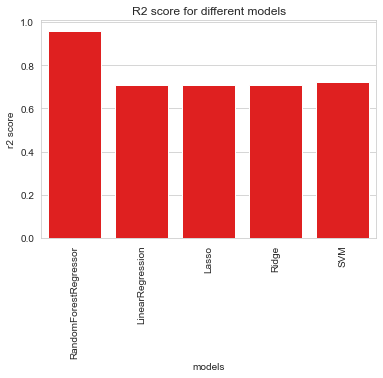

In [51]:
# Plot to visualize grid search results
results_dict = {"RandomForestRegressor":0.96, "LinearRegression":0.71, "Lasso":0.71, "Ridge":0.71, "SVM":0.72}
sns.barplot(list(results_dict.keys()), list(results_dict.values()), color="red")
plt.xticks(rotation=90)
plt.ylabel("r2 score")
plt.xlabel("models")
plt.title("R2 score for different models")
plt.show()

<b> Section Summary </b>
- Splitted the dataset between 80% of data for training and 20% for testing
- Performed HyperparameterTunning to 5 different regression models: RandomForestRegressor, LinearRegression, Lasso, Ridge, SVR
- Best results obtained with RandomForestRegressor
- All the models perform pretty similar except for RandomForestRegressor that clearly is the one doing a better job
- Best Mean Absolute Error: 4.13
- In average we are 4.13 lb away from the actual value
- R2: 0.96
- R2 Very close to 1, so our model is able to explain the proportion of variance of the weight feature AKA our model can predict well
- The whole process took 11 minutes approx

# MODEL EVALUATION

In [75]:
# Training the winner model to extract more insights
r_forest_model = RandomForestRegressor(bootstrap=False, 
                                       max_features='sqrt', 
                                       min_samples_leaf=1, 
                                       min_samples_split=2)
r_forest_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt')

In [76]:
# Testing test set
y_true = r_forest_model.predict(X_test)
print(f" MAE: {mean_absolute_error(y_test, y_true)} r2: {r2_score(y_test, y_true)}")

 MAE: 3.7437503607010636 r2: 0.9666092478468719


In [77]:
# Converting y_true to integers to improve the accuracy and reflect the whole numbers we find in a gym
y_true = [round(i) for i in y_true]
print(f" MAE: {mean_absolute_error(y_test, y_true)} r2: {r2_score(y_test, y_true)}")

 MAE: 3.7482582443102648 r2: 0.9666081260461842


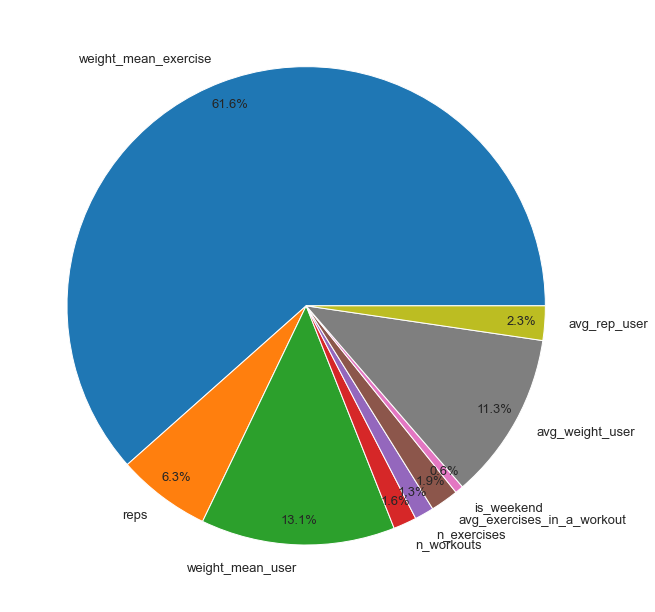

In [78]:
# computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.
# So, the features that allow to split the dataset better are more important
importance = r_forest_model.feature_importances_

# summarize feature importance
plt.rc('font', size=13) 
plt.figure(figsize=(11,11))
plt.pie(importance, labels=X_train.columns, autopct='%1.1f%%', pctdistance=0.90)

plt.show()

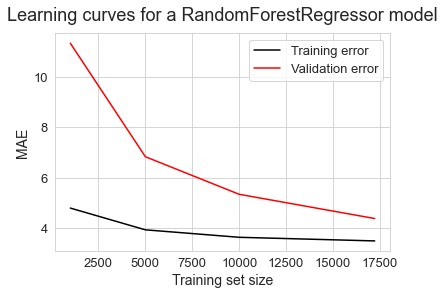

In [79]:
# Learning Curve to validate the model
# Score vs iterations
from sklearn.model_selection import learning_curve

train_sizes = [1000, 5000, 10000, 17223]

def learning_curves(estimator, X, y, train_sizes, cv):
    """
    This function uses sklearn learning_curve to obtain scores at different points (train set size)
    and plot the results, to obtain a better vision of over/under fitting
    
    Args:
        estimator: Model used in training
        X: Independent features
        y: Dependent feature
        train_sizes: Different train sizes to calculate a score on
        cv: Number of folds for cross-validation
        
    Returns:
        None (Instead plots a graph)
    """
    train_sizes, train_scores, validation_scores = learning_curve(
                                                 estimator, X, y, train_sizes = train_sizes,
                                                 cv = cv, scoring = 'neg_mean_absolute_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error', color="black")
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error', color="red")

    plt.ylabel('MAE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    
r_forest_model = RandomForestRegressor(bootstrap=True, 
                                       max_features='sqrt', 
                                       min_samples_leaf=1, 
                                       min_samples_split=2)

learning_curves(r_forest_model, X, y, train_sizes, 5)

<b> Section Summary </b>
- We can improve the results a little by changing the predictions automatically to whole numbers (Gym weights are likely to be whole numbers)
- When looking at the Feature importance, we realize that exerciseName, which was transformed into weight_mean_exercise
is responsible for the 60% of the achieved results
- Nice to see how a feature that was unusable actually becomes key in the process thanks to performing feature engineering
- By plotting the Learning curves we can see that the model is a little underfit
- It is clear that with more data we would achieve better results

# MODELING PT.2 (Time-series forecasting)

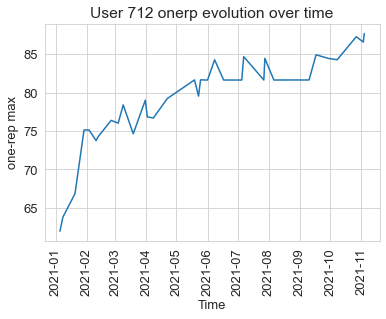

In [81]:
# Picking a user with several workouts doing the same exercise, after some research turned out that user 712 and Back Squat were
# good candidates for performing time-series forecasting
user_712 = df.loc[(df["fake_user_id"]=="fake_id_712") & (df["exerciseName"]=="Back Squat")]
user_712_date = user_712.groupby("Date").mean()
plt.xticks(rotation=90)
plt.title("User 712 onerp evolution over time")
plt.xlabel("Time")
plt.ylabel("one-rep max")
plt.plot(user_712_date.index, user_712_date["onerp"])
plt.show()

<b> Parameter tunning for ARIMA model </b>

In [82]:
import itertools
import statsmodels.api as sm

warnings.filterwarnings('ignore')

# Parameter tunning for ARIMA
# We need to find good values for p, d, q that correspond to seasonality, trend and noise in the data

# Generating values to try out
p = d = q = range(0, 2)
# Creating a combination by "product-crossing"
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Data to fit
y = user_712_date["onerp"]

best_aic = np.inf
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        if results.aic < best_aic:
            best_param = param
            best_param_seasonal = param_seasonal
            best_aic = results.aic
            
print(f"best pdq:{param}, best seasonal_pdq:{seasonal_pdq}, best Error(AIC): {results.aic}")

best pdq:(1, 1, 1), best seasonal_pdq:[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)], best Error(AIC): 49.66277645800484


<b> Model Fitting and Validation </b>

In [83]:
# Fitting the ARIMA model
# Using the parameters we found in the cell above
ARIMA_model = sm.tsa.statespace.SARIMAX(y,
                                order=best_param,
                                seasonal_order=best_param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = ARIMA_model.fit()

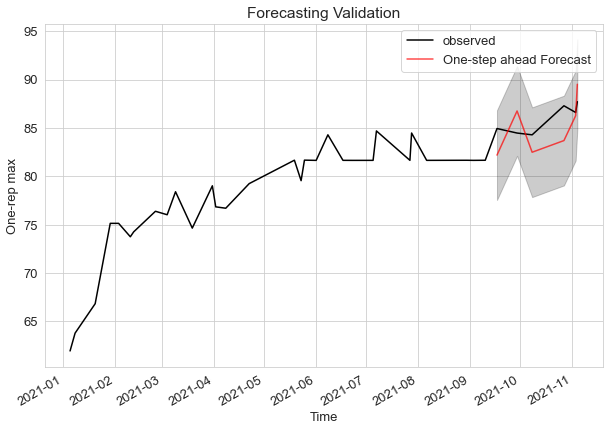

In [88]:
# Validating the model by predicting and overlapping with actual data
preds = results.get_prediction(start=pd.to_datetime('2021-09-17'), dynamic=False)
pred_ci = preds.conf_int()
ax = y.loc[pd.to_datetime('2021-01-05'):].plot(label='observed', color="black")
preds.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(10, 7),color="red")
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='black', alpha=.2)
ax.set_xlabel('Time')
ax.set_ylabel('One-rep max')
plt.title("Forecasting Validation")
plt.legend()
plt.show()

<b> Forecasting </b>

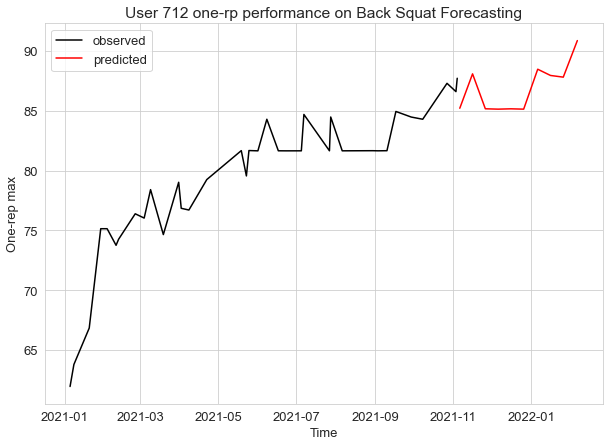

In [85]:
# Predicting time-series in the future
pred_uc = results.get_forecast(steps=10)
plt.figure(figsize=(10, 7))
plt.plot(y, label='observed', color="black")

pred_mean = pred_uc.predicted_mean

# Arbitrary dates
pred_mean = pd.DataFrame({"preds": pred_mean.values},
                   index=["2021-11-06", 
                          "2021-11-16", 
                          "2021-11-26", 
                          "2021-12-06", 
                          "2021-12-16",
                          "2021-12-26",
                          "2022-01-06",
                          "2022-01-16",
                          "2022-01-26",
                          "2022-02-06"])
pred_mean.index = pd.to_datetime(pred_mean.index)
plt.plot(pred_mean, label="predicted", color="red")

plt.title("User 712 one-rp performance on Back Squat Forecasting")
plt.xlabel('Time')
plt.ylabel('One-rep max')
plt.legend()
plt.show()

<b> Section Summary </b>
- We picked a user to perform time-series forecasting on them, it was a good candidate because they have a good amount of workouts on the same exercise
- Performed parameter tunning to find the best values for seasonality, trend and noise in order to fit the ARIMA model
- Validated the model by predicting some data for a known period of time, the overlap is not perfect but still shows an increase similar to the one in the actual data
- Predicted the evolution of user 712 for Back Squat in terms of one-rep max in the future